<a href="https://colab.research.google.com/github/kingslyt/pytorch-book/blob/main/Exercise_1_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1: Image Classifier (AlexNet)

# Download an image file to Colab. 
- Note: local files will be deleted when notebook instance is closed

In [ ]:
import urllib.request
url = "https://upload.wikimedia.org/wikipedia/commons/4/4a/Northern_Diamondback_Water_Snake_%28Nerodia_rhombifer_rhombifer%29_-_Flickr_-_GregTheBusker_%282%29.jpg"
urllib.request.urlretrieve(url, 'snake.jpg')

url = "https://raw.githubusercontent.com/joe-papa/pytorch-beginners-course/main/assets/imagenet_class_labels.txt"
urllib.request.urlretrieve(url, 'imagenet_class_labels.txt')

('imagenet_class_labels.txt', <http.client.HTTPMessage at 0x7f4d0ba5d9d0>)

# Load Image Data


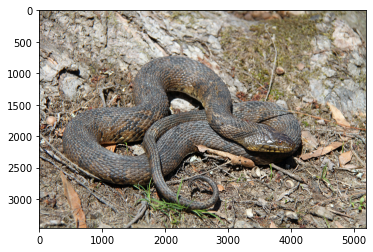

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('snake.jpg')
plt.imshow(img)

# Pre-process Image
Center Crop, Convert To Tensor, Normalize, & Batch

Pre-trained ImageNet models like AlexNet here expect input images to be normalized the same way as the NN was trained. See more info [here](https://pytorch.org/vision/stable/models.html). 

In [ ]:
import torch
from torchvision import transforms

In [ ]:
transform = transforms.Compose([
   transforms.Resize(256),
   transforms.CenterCrop(224),
   transforms.ToTensor(),
   transforms.Normalize(
      mean=[0.485, 0.456, 0.406],
      std=[0.229, 0.224, 0.225])])

img_t = transform(img);
img_t.shape

torch.Size([3, 224, 224])

In [ ]:
img_t_batch = img_t.unsqueeze(0)
img_t_batch.shape

torch.Size([1, 3, 224, 224])

# Image Classifier NN (Inference)

In [ ]:
from torchvision import models

In [ ]:
model = models.alexnet(pretrained=True)
model.eval()

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

# Post-process NN Outputs
Find maximum label value and convert to string

In [ ]:
y = model(img_t_batch)
print(y.shape)

torch.Size([1, 1000])


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [ ]:
_, index = y.max(1)
print(index)
print(index.item())


tensor([58])
58


In [ ]:
with open('imagenet_class_labels.txt', 'r') as f:
  labels = eval(f.read())

In [ ]:
labels[index.item()]

'water snake'

# Putting it all into one function ...

In [ ]:
import torch
from torchvision import transforms, models
from PIL import Image
import matplotlib.pyplot as plt

transform = transforms.Compose([
  transforms.Resize(256),
  transforms.CenterCrop(224),
  transforms.ToTensor(),
  transforms.Normalize(
      mean=[0.485, 0.456, 0.406],
      std=[0.229, 0.224, 0.225])])

model = models.alexnet(pretrained=True)
model.eval()

with open('imagenet_class_labels.txt', 'r') as f:
  labels = eval(f.read())

def classify_image(image_filename):
  img = Image.open(image_filename)
  plt.imshow(img)
  img_t = transform(img)
  img_t_batch = img_t.unsqueeze(0)

  y = model(img_t_batch)
  _, index = y.max(1)
  return labels[index.item()]

'water snake'

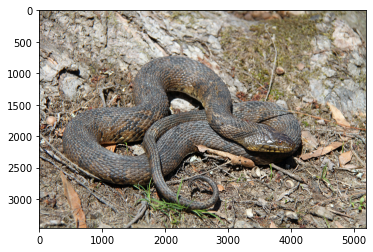

In [ ]:
classify_image('snake.jpg')

# Recap
You've learned how to:
- Use classes to create special data objects (e.g. transforms.ToTensor, models.alexnet)
- Create tensors and use tensor operations (unsqueeze, max, item)
- Create a collection of transforms for image processing using torchvision.transfroms
- Load a pretrained NN model from torchvision.models



# Things to Try
- Test classify_image() with other images
- Read a folder of images and classify them as a batch 
- Return to top 5 labels and their probabilities for each image
- Try another model (e.g. VGG, ResNet, SqueezeNet)